In [1]:
from sklearn.utils import shuffle


MNIST contains 70000 images of hand-written digits
each 28 * 28 pixels in gryscale with pixel-values from 0 to 255. We could download and preprocess the data ourseleves. 



In [2]:

from sklearn.datasets import fetch_openml 
X,y  = fetch_openml('mnist_784', version=1, 
                          return_X_y=True)

In [3]:
#to normalize the X values to keep it under 0 to 255 
X= X/255
print(y[:14])
print(X.shape)

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6']
(70000, 784)


In [4]:
import numpy as np

y_new =np.zeros(y.shape)
for i in range(y.shape[0]):
    if(y[i]=='0'):
        y_new[i]=1
print(y_new)
y=y_new

[0. 1. 0. ... 0. 0. 0.]


# Splitting the dataset into training and testing

In [5]:
# y contains 1 for ifthe image is 0 or else 0 
#for non-zero classes
train_length = 60000
test_length = X.shape[0]-train_length
print("Splitting the dataset into training and testing")
print("training samples :"+str(train_length)+" test samples:"+str(test_length))
X_train , X_test = X[:train_length].T,X[train_length:].T
print("train X shape: "+str(X_train.shape[1])+"\ntest X shape:"+str(X_test.shape[1]))
y_train,y_test = y[:train_length].reshape(1,train_length),y[train_length:].reshape(1,test_length)
print("train y shape: "+str(y_train.shape)+"\ntest y shape:"+str(y_test.shape))


Splitting the dataset into training and testing
training samples :60000 test samples:10000
train X shape: 60000
test X shape:10000
train y shape: (1, 60000)
test y shape:(1, 10000)


In [6]:
np.random.seed(138)
shuffle_index = np.random.permutation(train_length)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]
print(X_train.shape[1])

60000


# Viewing data samples from training set

[0.]	[1.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	

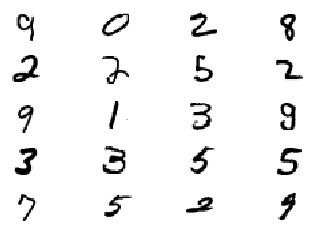

In [7]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

i=3 
nrows= 5
ncols=4
for i in range(20):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('on') # Don't show axes (or gridlines)
    plt.imshow(X_train[:,i].reshape(28,28),cmap = matplotlib.cm.binary)
    print(y_train[:,i],end="\t")
    plt.axis("off")
plt.show()



# A Single neuron (aka logistic regression )
#Single class classification
As we are considering only '0' class the target variable is either 0 if it is not zero in image or 1 if is a zero in image

# Forward Propogation: 
y = sigma(w^T * x +b)
signmoid fuction: 
sigma(z) = (1 / (1+e^-z))

In [8]:
#  the s here is the Activation function value
def sigmoid(z): 
    s= 1/(1 + np.exp(-z))
    return s 

The Z value for the sigmoid function can be computed by 

np.matmul(W.T, X)+b 

hence z value is not a scalar but a vector
We’ll use cross-entropy for our cost function. 
The formula for a single training example is: 

L(y,ŷ)=−ylog(ŷ)−(1−y)log(1−ŷ)

Averaging over a training set of m examples we then have:

L(Y,Ŷ)=−1/m∑i=1m(y^(i)log(ŷ^(i))+(1−y^(i))log(1−ŷ^(i)))

In [9]:
def compute_loss(Y,Y_hat):
    m= Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )
    return L

Finally we can substitute into the chain rule to find:
∂L/∂wj=∂L/∂ŷ*∂ŷ/∂z*∂z/∂wj  ---> (ŷ−y)wj [Scalar quantity]

1)∂L/∂w=1/m*X(ŷ−y)^T --->[Vector quantity]
2)∂L/∂b=1/m*∑i=1Tom(ŷ(i)−y(i)) --->[Vector quantity]

i’ll label these gradients according to their denominators, as dW and db. So for backpropagation we’ll compute 

dW = (1/m) * np.matmul(X, (A-Y).T) -->[∂L/∂w]and 

db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)[∂L/∂w]

In [34]:
learning_rate = 1.0
X=X_train
y=y_train

n_x = X.shape[0]
m=X.shape[1]
print(X.shape[1],y.shape[1],"\nn_x(first layer)",m
      ,"\nNumber of samples: ",n_x)
W=np.random.randn(n_x,1)*0.01
#fill zeros for (rows, cols) -> (1,1) 1row & 1col
b=np.zeros((1,1))
print("bias: "+str(b))

for i in range(2000):
    Z=np.matmul(W.T,X)+b
    A=sigmoid(Z)
    # y_hat = Activation function
    cost = compute_loss(y,A)
    
    dW = (1/m) * np.matmul(X, (A-y).T) 
    db = (1/m) * np.sum(A-y, axis=1, keepdims=True)
    
    W = W -learning_rate * dW
    b = b -learning_rate * db
    
    if(i % 100 == 0):
        print("Epoch", i, "cost: ",cost)
print("Final cost:", cost)

60000 60000 
n_x(first layer) 60000 
Number of samples:  784
bias: [[0.]]
Epoch 0 cost:  0.690062639294071
Epoch 100 cost:  0.041353631903225475
Epoch 200 cost:  0.03582155605411296
Epoch 300 cost:  0.03325263912475694
Epoch 400 cost:  0.03164906103353909
Epoch 500 cost:  0.030507386195851624
Epoch 600 cost:  0.029633944733120827
Epoch 700 cost:  0.028935287004216412
Epoch 800 cost:  0.02835929538826425
Epoch 900 cost:  0.027873871059235496
Epoch 1000 cost:  0.027457797874105336
Epoch 1100 cost:  0.027096307087125685
Epoch 1200 cost:  0.026778707482164456
Epoch 1300 cost:  0.026497019916701066
Epoch 1400 cost:  0.02624514201879309
Epoch 1500 cost:  0.026018312084556613
Epoch 1600 cost:  0.025812751368771314
Epoch 1700 cost:  0.02562541766330368
Epoch 1800 cost:  0.02545383095639554
Epoch 1900 cost:  0.025295947270018212
Final cost: 0.02515146986256394


In [76]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[8979   33]
 [  41  947]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9012
        True       0.97      0.96      0.96       988

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



# one layer + hidden layer(64 neurons)


In [32]:
learning_rate = 0.8
X=X_train
y=y_train

#number of neurons in the first layer
n_x = X.shape[0]
m=X.shape[1]
#number of neurons in the hidden layer
n_h=64

print(X.shape,y.shape,"\nn_x(first layer)",m
      ,"\nNumber of samples: ",n_x,"\nNumber of hidden neurons:",n_h)
#randn method generates the random values in the form 
#of matrix . In the below case, as the weights go between the 
#fully connected layer(60000 samples) and hidden layer (64 neurons)
W1=np.random.randn(n_h,n_x)
#fill zeros for (rows, cols) -> (1,1) 1row & 1col
#in this case (64,1) 64 rows and 1 col
b1=np.zeros((n_h,1))
#In this case the randn function one row with 64 columns 
W2 =np.random.randn(1,n_h)
#in this case the output of the model should be 1 value 
# so the output is the 1 row and 1 column
b2=np.zeros((1,1))

print("Weight1 W1: ",W1.shape,"\tbias1 b1: ",b1.shape,"\nWeight2 W2: ",W2.shape,"\tbias2 b2",b2.shape)

for i in range(2000):
    Z1=np.matmul(W1,X)+b1
    A1=sigmoid(Z1)
    Z2=np.matmul(W2,A1)+b2
    A2=sigmoid(Z2)
    # y_hat = Activation function
    cost = compute_loss(y,A2)

    dZ2 = A2-y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
          
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

(784, 60000) (1, 60000) 
n_x(first layer) 60000 
Number of samples:  784 
Number of hidden neurons: 64
Weight1 W1:  (64, 784) 	bias1 b1:  (64, 1) 
Weight2 W2:  (1, 64) 	bias2 b2 (1, 1)
Epoch 0 cost:  1.8781126759697913
Epoch 100 cost:  0.09709508030746875
Epoch 200 cost:  0.0695532253508136
Epoch 300 cost:  0.05814555211646256
Epoch 400 cost:  0.051440027421343244
Epoch 500 cost:  0.04686013556977249
Epoch 600 cost:  0.04346121711728291
Epoch 700 cost:  0.04079397593660481
Epoch 800 cost:  0.038614945123903906
Epoch 900 cost:  0.036785445049844594
Epoch 1000 cost:  0.03522227753067303
Epoch 1100 cost:  0.03386775964008793
Epoch 1200 cost:  0.03267689896107443
Epoch 1300 cost:  0.031615142577526664
Epoch 1400 cost:  0.030657001499035802
Epoch 1500 cost:  0.029783958950155377
Epoch 1600 cost:  0.02898258083071087
Epoch 1700 cost:  0.02824305224473213
Epoch 1800 cost:  0.027557921045011192
Epoch 1900 cost:  0.026920985102467678
Final cost: 0.026332407319913483


In [33]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[8980   40]
 [  40  940]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9020
        True       0.96      0.96      0.96       980

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



# Multi label classification

In [59]:
from sklearn.datasets import fetch_openml 
X,y  = fetch_openml('mnist_784', version=1, 
                          return_X_y=True)
X=X/255

In [60]:
digits = 10
examples= y.shape[0]
print(y.shape)

y = y.reshape(1,examples)


(70000,)


In [61]:
#np.eye returns an array of size of digits i.e 10(in this case) 
#y_new has 1's in the diagonal and 0's elsewhere
#y.astype('int32') argument is used to put 1's in the position
#according to the y array number in such a way to 70000 samples 
# each having 1 in the position of the digit depiction
y_new = np.eye(digits)[y.astype('int32')]
print("y_new shape:",y_new.shape)
print(y.astype('int32'))

y_new shape: (1, 70000, 10)
[[5 0 4 ... 4 5 6]]


In [62]:
y_new = y_new.T.reshape(digits,examples)
print("y_new: shape ",y_new.shape)

y_new: shape  (10, 70000)


Re-split , rehape and re-shuffle the dataset

In [63]:
No_of_samples_train = 60000
No_of_samples_test = X.shape[0]-m

X_train, X_test = X[:m].T,X[m:].T
Y_train,Y_test = y_new[:,:m],y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train,Y_train = X_train[:,shuffle_index],Y_train[:,shuffle_index]


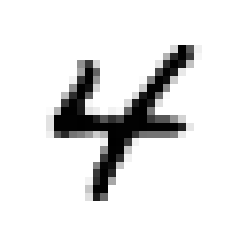

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [66]:
i = 2
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

Forward Propagation: 
The final output which is one node will be replaced by 10 nodes 
because of representation of 10 digits
Hence the activation function sigma(z) is calculated for each unit i :e^zi/∑(j=0 to 9)e^zj


Cost funtion : has to generalize to more than 2 classes. The general formula for n classes is 
L(y,ŷ)=−∑(i=0 to n)y(i)*log(ŷi).
Averaging over m samples: 
L(Y,Ŷ)=−1/m∑(j=0 to m)∑(i=0 to n)y^(j)log(ŷ^(j)).
    

In [68]:
def compute_multiclass_loss(Y,Y_hat):
    
    L_sum = np.sum(np.multiply(Y,np.log(Y_hat)))
    m=Y.shape[1]
    L=-(1/m)* L_sum
    return L

In [69]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  7.376709570967475
Epoch 100 cost:  0.7428469430716562
Epoch 200 cost:  0.5557586080703597
Epoch 300 cost:  0.4776808468365544
Epoch 400 cost:  0.43157507082224356
Epoch 500 cost:  0.39986280333244556
Epoch 600 cost:  0.37602413331009715
Epoch 700 cost:  0.357049495270229
Epoch 800 cost:  0.3413467382449301
Epoch 900 cost:  0.32796809522028375
Epoch 1000 cost:  0.31631003965939253
Epoch 1100 cost:  0.30597591202287994
Epoch 1200 cost:  0.2966956655821704
Epoch 1300 cost:  0.2882768356274176
Epoch 1400 cost:  0.2805759948619913
Epoch 1500 cost:  0.27348394303519713
Epoch 1600 cost:  0.2669165492486281
Epoch 1700 cost:  0.2608069381940334
Epoch 1800 cost:  0.255099277801469
Epoch 1900 cost:  0.24974528614366043
Final cost: 0.2447520558080259


In [71]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 952    0   15    1    1   12   15    1    7    4]
 [   0 1102    2    2    0    2    3    9    9    4]
 [   5    4  924   22   10    3    7   26   13    2]
 [   1    6   20  918    2   33    3   10   26   16]
 [   1    0   13    0  906    9   18   11    8   43]
 [   8    4   11   26    2  773   14    6   28    6]
 [   7    5    6    3    9   16  891    0    6    4]
 [   3    1   14    8    8   12    3  930   12   23]
 [   3   13   24   24    6   25    3    4  858    9]
 [   0    0    3    6   38    7    1   31    7  898]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1008
           1       0.97      0.97      0.97      1133
           2       0.90      0.91      0.90      1016
           3       0.91      0.89      0.90      1035
           4       0.92      0.90      0.91      1009
           5       0.87      0.88      0.87       878
           6       0.93      0.94      0.94       947
           7       0.90      0.92   

# Optmized model for boosting accuracy- 
The difference b/w previous and current model is that Mini batch descent is considered by adding a another for loop inside each batch processing for loop. At each pass, the training set is shuffled and batch size is 128. 
setting the variance of the initialization to 1/n shrinks the weights. Hence while initializing weights dividing by  p.sqrt(1./n_x)


In [72]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# import
from sklearn.datasets import fetch_openml 
X,y  = fetch_openml('mnist_784', version=1, 
                          return_X_y=True)

# scale
X = X / 255

# one-hot encode labels
digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

# split, reshape, shuffle
m = 60000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [73]:
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

def feed_forward(X, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]
    cache["A1"] = sigmoid(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache

def back_propagate(X, Y, params, cache):

    dZ2 = cache["A2"] - Y
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [74]:
np.random.seed(138)

# hyperparameters
n_x = X_train.shape[0]
n_h = 64
learning_rate = 4
beta = .9
batch_size = 128
batches = -(-m // batch_size)

# initialization
params = { "W1": np.random.randn(n_h, n_x) * np.sqrt(1. / n_x),
           "b1": np.zeros((n_h, 1)) * np.sqrt(1. / n_x),
           "W2": np.random.randn(digits, n_h) * np.sqrt(1. / n_h),
           "b2": np.zeros((digits, 1)) * np.sqrt(1. / n_h) }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)

# train
for i in range(9):

    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache)

        V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
        V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
        V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
        V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])

        params["W1"] = params["W1"] - learning_rate * V_dW1
        params["b1"] = params["b1"] - learning_rate * V_db1
        params["W2"] = params["W2"] - learning_rate * V_dW2
        params["b2"] = params["b2"] - learning_rate * V_db2

    cache = feed_forward(X_train, params)
    train_cost = compute_loss(Y_train, cache["A2"])
    cache = feed_forward(X_test, params)
    test_cost = compute_loss(Y_test, cache["A2"])
    print("Epoch {}: training cost = {}, test cost = {}".format(i+1 ,train_cost, test_cost))

print("Done.")

Epoch 1: training cost = 0.15289188610758328, test cost = 0.15896132708794716
Epoch 2: training cost = 0.10085958305622832, test cost = 0.11929251693876221
Epoch 3: training cost = 0.09060707621694518, test cost = 0.12329525126099913
Epoch 4: training cost = 0.06342341756474529, test cost = 0.09910809479271464
Epoch 5: training cost = 0.05982493064697334, test cost = 0.09451228374481334
Epoch 6: training cost = 0.04747558007215102, test cost = 0.09014035845674313
Epoch 7: training cost = 0.046833023412061935, test cost = 0.09595219893815515
Epoch 8: training cost = 0.03534418411103081, test cost = 0.09147580432857733
Epoch 9: training cost = 0.03175458971480449, test cost = 0.08557197998648979
Done.


In [75]:
cache = feed_forward(X_test, params)
predictions = np.argmax(cache["A2"], axis=0)
labels = np.argmax(Y_test, axis=0)

print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       984
           1       0.99      0.99      0.99      1136
           2       0.97      0.97      0.97      1036
           3       0.99      0.96      0.97      1040
           4       0.97      0.98      0.97       975
           5       0.96      0.98      0.97       876
           6       0.97      0.98      0.98       955
           7       0.96      0.98      0.97      1005
           8       0.97      0.96      0.97       985
           9       0.97      0.97      0.97      1008

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# The Accuracy is 97% of the model with one fully connected layer, one hidden layer and softmax with mini batch gradient